# Dependencies

In [2]:
import tensorflow as tf

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tf.__version__

'2.13.0'

# Importing Data

In [7]:
df = pd.read_csv('breastcancerdata.csv')

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning

In [10]:
df.drop(columns = ['Unnamed: 32'], inplace = True)

# EDA

<AxesSubplot:>

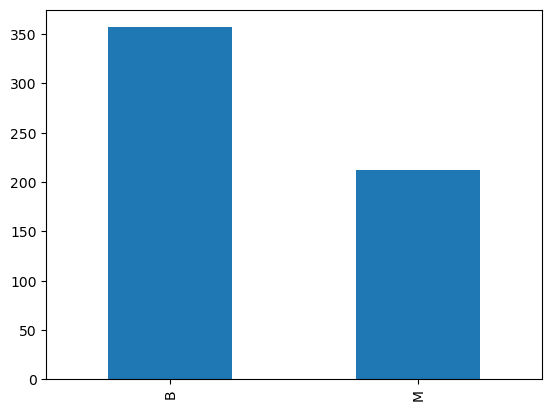

In [11]:
df.diagnosis.value_counts().plot(kind = 'bar')

<AxesSubplot:>

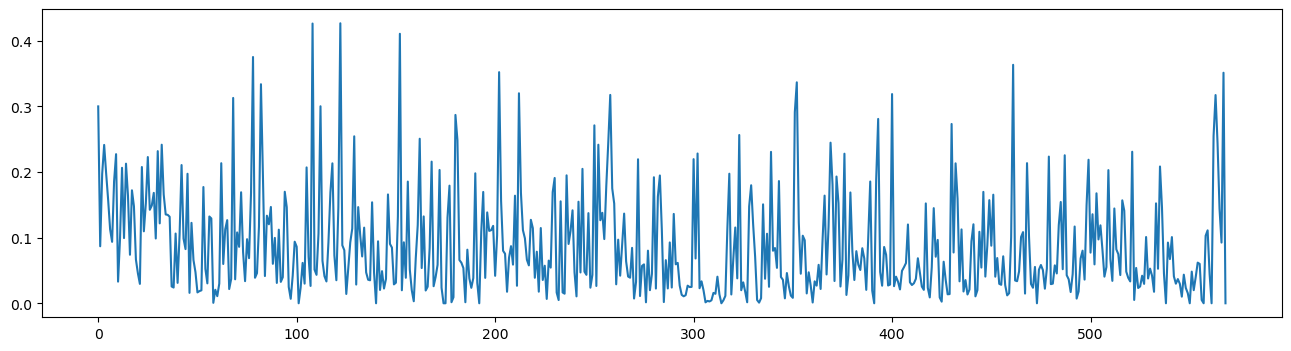

In [12]:
fig, ax = plt.subplots(figsize = (16, 4))
df.concavity_mean.plot()

In [13]:
malignant = df[df.diagnosis == 'M']
benign = df[df.diagnosis == 'B']

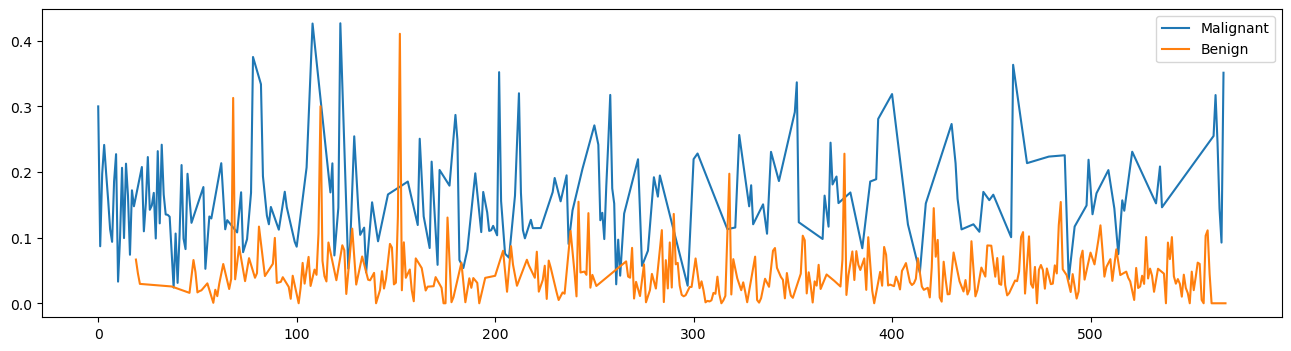

In [15]:
fig, ax = plt.subplots(figsize = (16,4))
plt.plot(malignant.concavity_mean, label = 'Malignant')
plt.plot(benign.concavity_mean, label = 'Benign')
plt.legend()

# Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

In [20]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 42)

In [24]:
X_train.shape

(512, 31)

In [25]:
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [26]:
model = Sequential()

model.add(Dense(32, input_shape=(31,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [28]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = Adam(learning_rate = 0.0001))

In [29]:
model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, verbose = 1, batch_size = 8)

Epoch 1/50
58/58 [==============================] - 1s 7ms/step - loss: 0.9107 - accuracy: 0.4478 - val_loss: 0.7839 - val_accuracy: 0.4615
Epoch 2/50
58/58 [==============================] - 0s 3ms/step - loss: 0.8849 - accuracy: 0.4000 - val_loss: 0.7272 - val_accuracy: 0.5577
Epoch 3/50
58/58 [==============================] - 0s 3ms/step - loss: 0.7949 - accuracy: 0.5478 - val_loss: 0.6757 - val_accuracy: 0.6346
Epoch 4/50
58/58 [==============================] - 0s 3ms/step - loss: 0.7493 - accuracy: 0.5630 - val_loss: 0.6315 - val_accuracy: 0.7115
Epoch 5/50
58/58 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.6152 - val_loss: 0.5913 - val_accuracy: 0.7885
Epoch 6/50
58/58 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6674 - val_loss: 0.5573 - val_accuracy: 0.7885
Epoch 7/50
58/58 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6935 - val_loss: 0.5281 - val_accuracy: 0.8077
Epoch 8/50
58/58 [==

# Model Evaluation

In [30]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [31]:
y_pred = (y_pred >= 0.5).astype(int)

In [32]:
confusion_matrix(y_test, y_pred)

array([[40,  0],
       [ 1, 16]], dtype=int64)